## Task 1: Exploratory Data Analysis (EDA) and Business Insights

### **Prerequisites**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Customers = pd.read_csv('/content/drive/MyDrive/ZeoTap/Customers.csv')
Products = pd.read_csv('/content/drive/MyDrive/ZeoTap/Products.csv')
Transactions = pd.read_csv('/content/drive/MyDrive/ZeoTap/Transactions.csv')

In [ ]:
Customers.info()

In [ ]:
Products.info()

In [ ]:
Transactions.info()

### **Insight - I : Best selling product and product category by quantity sold**

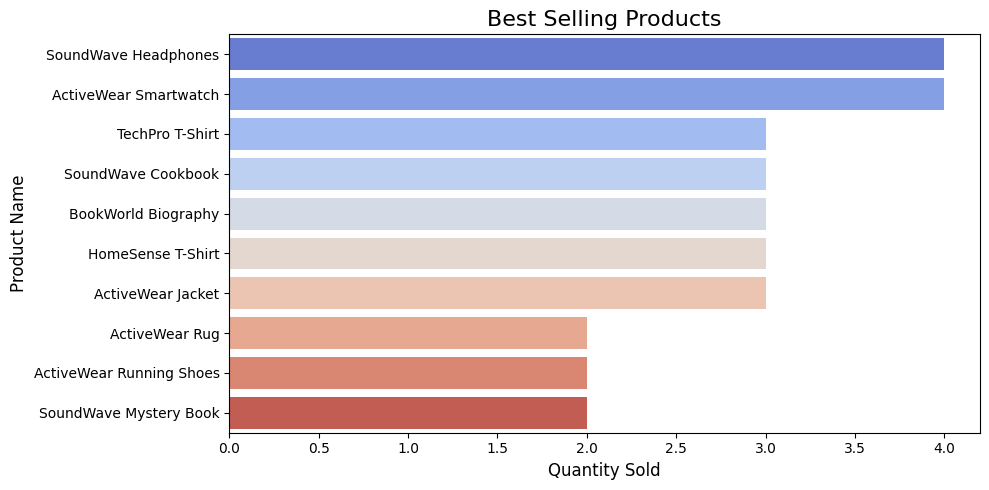

In [19]:
Best_selling_product = Products.groupby('ProductName').size().sort_values(ascending=False).head(10)

Best_selling_df = Best_selling_product.reset_index()
Best_selling_df.columns = ['ProductName', 'Quantity']
custom_colors = sns.color_palette("coolwarm", len(Best_selling_df))

# Plotting the chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=Best_selling_df,
    x='Quantity',
    y='ProductName',
    hue='ProductName',
    palette=custom_colors,
    orient='h'
)
plt.title('Best Selling Products', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

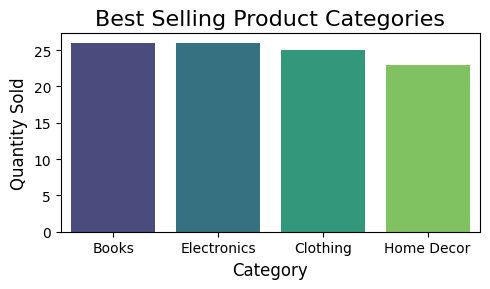

In [15]:
Best_selling_product_category = Products.groupby('Category').size().sort_values(ascending=False)

Best_selling_category_df = Best_selling_product_category.reset_index()
Best_selling_category_df.columns = ['Category', 'Quantity']

# Plotting the chart
plt.figure(figsize=(5, 3))
sns.barplot(data=Best_selling_category_df, x='Category', y='Quantity', palette='viridis', hue='Category')
plt.title('Best Selling Product Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks( ha='center', fontsize=10)
plt.tight_layout()
plt.show()


### **Insight-II: User Signups Over the Years**

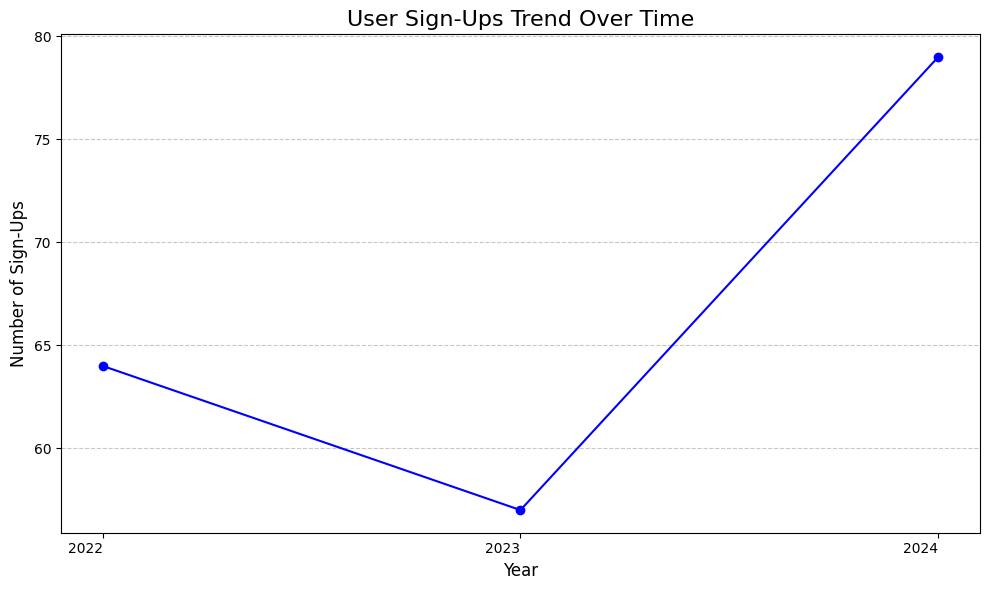

In [16]:

Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])
Customers['Year'] = Customers['SignupDate'].dt.year


signups_by_year = Customers.groupby('Year').size().reset_index(name='Signups')

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(signups_by_year['Year'].astype(str), signups_by_year['Signups'], marker='o', color='b')
plt.title('User Sign-Ups Trend Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Sign-Ups', fontsize=12)
plt.xticks(fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Insight-III:  Highest spending customers**

In [5]:
customer_transactions = pd.merge(Customers, Transactions, on='CustomerID')
customer_transactions['Total_Amount'] = customer_transactions['Quantity'] * customer_transactions['Price']
customer_transactions.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Total_Amount
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,114.60
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,412.62
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,614.94
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,911.44
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,1300.92


In [15]:
top_customers = (
    customer_transactions.groupby(['CustomerID', 'CustomerName'])['Total_Amount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
top_customers

,CustomerID,CustomerName,Total_Amount
0,C0141,Paul Parsons,10673.87
1,C0054,Bruce Rhodes,8040.39
2,C0065,Gerald Hines,7663.70
3,C0156,William Adams,7634.45
4,C0082,Aimee Taylor,7572.91
...,...,...,...
194,C0014,Deborah Wilcox,318.66
195,C0151,Amber Gonzalez,223.96
196,C0097,Tina Ford,137.54
197,C0033,Tyler Holt,132.64


In [10]:
differences = top_customers['Total_Amount'].diff().dropna()
differences.mean()

-76.12333333333332

### **Insight-IV: Monthly trends in transactions**

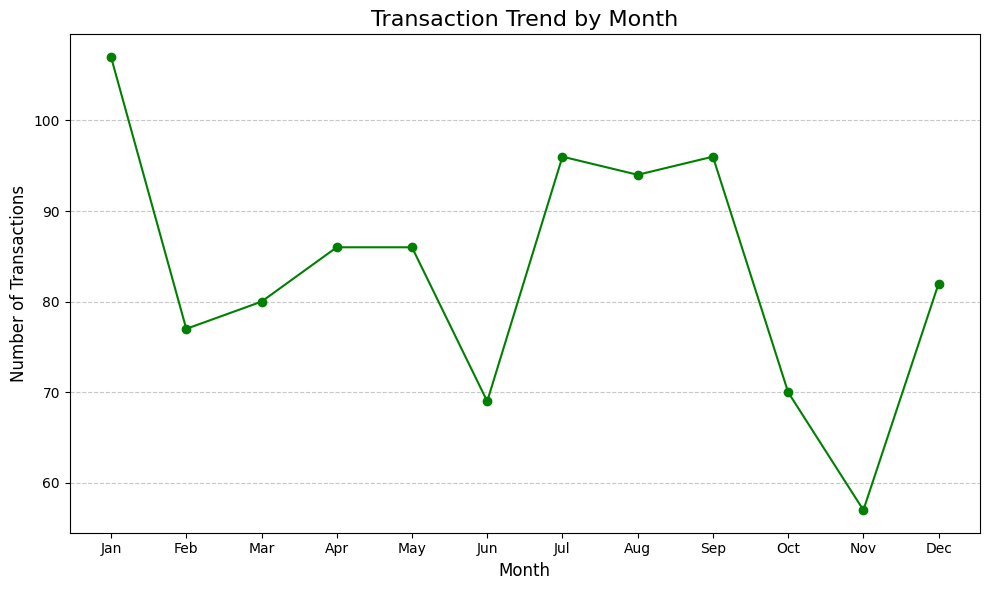

In [11]:
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])
Transactions['Month'] = Transactions['TransactionDate'].dt.month

transactions_by_month = Transactions.groupby('Month').size().reset_index(name='Transactions')

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_month['Month'], transactions_by_month['Transactions'], marker='o', color='g')
plt.title('Transaction Trend by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Insight-V: Most active regions in terms of transaction volume**

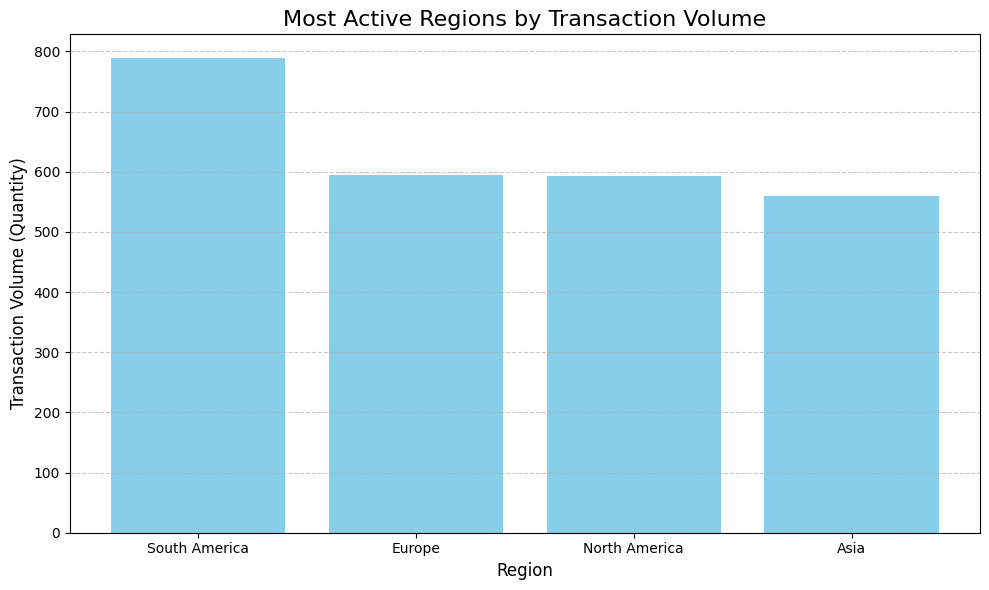

In [13]:
merged_data = pd.merge(Transactions, Customers, on='CustomerID')
region_transaction_volume = merged_data.groupby('Region')['Quantity'].sum().reset_index()
region_transaction_volume = region_transaction_volume.sort_values(by='Quantity', ascending=False)

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.bar(region_transaction_volume['Region'], region_transaction_volume['Quantity'], color='skyblue')
plt.title('Most Active Regions by Transaction Volume', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Transaction Volume (Quantity)', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()